HELLO EVERYONE!!


Here is my first try on VS code with my experience in Data Science
It maybe less but must be better

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Get the datas

In [3]:
#sns.get_dataset_names() #if you want to know what we can get

In [26]:
df = sns.load_dataset('titanic')

Clean useless data for an accurate output
This step might take 50% of your time

First, find data missing and how to fix them

In [27]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Then, fix it

In [29]:
# df['age'] = df['age'].fillna(df['age'].mean())    # แทนที่ Nan ใน age ด้วย Mean
#df.dropna(subset = ['age'], inplace = True)         # Delete Nan Row
#df.dtypes  #check type of Variable

In [8]:
df2 = df.drop(['parch','sibsp','embarked','adult_male','deck','embark_town','alone'], axis = 1) # Del no need row
df2['survived'] = df2.astype('category') # change from Int64 into Category type
df2['pclass'] = df2.astype('object') # change from Int64 into Object type
print(df2.head())
print(set(df['sex'])) # show option in 'sex'
print(df[df['sex'] == 'male'][:2]) # show all data if 'sex = male
print(df[df['sex'] == 'male']['class'][:3]) # show class if 'sex' = male
print(df[(df['sex'] == 'male') & (df['alive'] == 'yes')][:2])

  survived pclass     sex   age     fare  class    who alive
0        0      0    male  22.0   7.2500  Third    man    no
1        1      1  female  38.0  71.2833  First  woman   yes
2        1      1  female  26.0   7.9250  Third  woman   yes
3        1      1  female  35.0  53.1000  First  woman   yes
4        0      0    male  35.0   8.0500  Third    man    no
{'male', 'female'}
   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   
4         0       3  male  35.0      0      0  8.05        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
4        True  NaN  Southampton    no   True  
0    Third
4    Third
6    First
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']
    survived  pclass   sex   age  sibsp  parch  fare embarked   class  who  \
21         1       2  male  34.0      0      0  13.0

In [9]:
print(df.columns)
dfc = df.rename(columns = {'pclass':'class num'}) # change column name
print(dfc.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Index(['survived', 'class num', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Use pivot table to show main target information

In [10]:
pvt = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'], margins=True)
#pvt = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'])
pvt

count          
      class          
alive    no  yes  All
who                  
child    34   49   83
man     341   72  413
woman    49  169  218
All     424  290  714

<AxesSubplot:xlabel='who'>

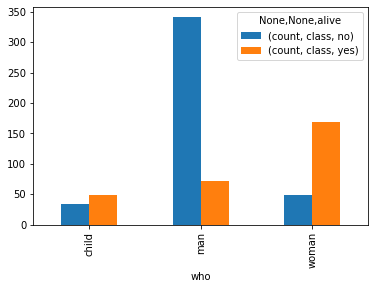

In [11]:
pvt2 = df2.pivot_table(index=['who'], columns=['alive'], values=['class'], aggfunc=['count'])
pvt2.plot.bar()

In [12]:
pvt3 = df2.pivot_table(index=['alive'],columns=['class'],values=['fare'],aggfunc='sum')
pvt3

fare                      
class       First     Second      Third
alive                                  
no      4310.8040  1867.9458  3558.6037
yes    12050.0503  1846.6334  1137.8458

In [88]:
dfdc = df.drop(['parch','embarked','adult_male','deck','embark_town','alone','who','pclass','survived'], axis = 1) 
#print(dfdc.dtypes)
#print(dfdc.isnull().any())
dfdc['age'] = pd.to_numeric(df['age'],errors='coerce') # Change -- * / + into missing data ('Nan) 
dfdc['age'] = dfdc['age'].fillna(dfdc['age'].mean())
# dfdc['age'] = dfdc.astype('int64')
dfdc['age'].isnull().any()
dfdc[dfdc['age'].isnull()]
#print(dfdc.dtypes,'\n')
print('The sex of Passenger is','\n',dfdc.groupby('sex')['sex'].count())
print(dfdc.pivot_table(index=['sex'], aggfunc=['count']),'\n')
print('',dfdc.groupby('alive')['sex'].count())
print(dfdc.pivot_table(index=['alive'],columns=['sex'],values=['class'], aggfunc=['count'],margins='True'))

The sex of Passenger is 
 sex
female    314
male      577
Name: sex, dtype: int64
       count                       
         age alive class fare sibsp
sex                                
female   314   314   314  314   314
male     577   577   577  577   577 

 alive
no     549
yes    342
Name: sex, dtype: int64
       count          
       class          
sex   female male  All
alive                 
no        81  468  549
yes      233  109  342
All      314  577  891
